In [1]:
from keras.models import Model
from keras.layers import Input
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, AveragePooling2D
from keras.layers.merge import concatenate

from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Flatten, Dense
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.callbacks import ModelCheckpoint, EarlyStopping

from tensorflow import keras

from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout
from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import SGD
import cv2, numpy as np

In [2]:
train_datagen_with_aug = ImageDataGenerator(rescale=1./255,
                                   horizontal_flip=True,
                                   shear_range=0.2,
                                   zoom_range=[0.2,0.5],
                                   width_shift_range = 0.3,
                                   height_shift_range = 0.3,
                                   validation_split=0.2)

train_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images',
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='training'
    ) # set as training data

validation_generator = train_datagen_with_aug.flow_from_directory(
    r'D:\My Work\Baranidharan Sir Research\cnn_xrays_images', # same directory as training data
    target_size=(331, 331),
    batch_size=32,
    # color_mode='grayscale',
    class_mode='categorical',
    subset='validation'
    ) # set as validation data

input_img = Input(shape=(331, 331, 3))

Found 5121 images belonging to 3 classes.
Found 1278 images belonging to 3 classes.


In [3]:
print(train_generator.samples)

5121


In [4]:
from keras.applications import densenet

DENSENET_169 = Sequential()

densenet169_model = keras.applications.densenet.DenseNet169(
    include_top=False, weights='imagenet',
    input_shape=(331,331,3), pooling=('max'), classes=3
)

In [5]:
for layer in densenet169_model.layers:
    layer.trainable = False
    
DENSENET_169.add(densenet169_model)
DENSENET_169.add(Flatten())
DENSENET_169.add(Dense(512,activation='relu'))
DENSENET_169.add(Dense(3, activation='softmax'))

DENSENET_169.summary()

Adam = keras.optimizers.Adam(learning_rate=0.001)
DENSENET_169.compile(optimizer=Adam, loss='categorical_crossentropy', metrics=['accuracy'])

graph = DENSENET_169.fit(train_generator, epochs=25, validation_data = validation_generator, steps_per_epoch=train_generator.samples//32)

graph

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet169 (Functional)     (None, 1664)              12642880  
_________________________________________________________________
flatten (Flatten)            (None, 1664)              0         
_________________________________________________________________
dense (Dense)                (None, 512)               852480    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 1539      
Total params: 13,496,899
Trainable params: 854,019
Non-trainable params: 12,642,880
_________________________________________________________________
Epoch 1/25
160/160 [==============================] - 940s 6s/step - loss: 1.1471 - accuracy: 0.6557 - val_loss: 0.5349 - val_accuracy: 0.7973
Epoch 2/25
160/160 [==============================] - 951s 6s/step - loss: 0.6166 - accuracy:

<Figure size 432x288 with 0 Axes>

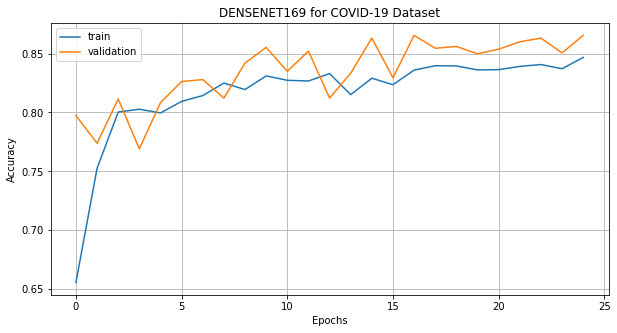

In [13]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()

plt.figure(figsize=(10,5))

plt.plot(graph.history['accuracy'])
plt.plot(graph.history['val_accuracy'])

# plt.axis(ymin=0.4, ymax=1)
plt.grid()

plt.title('DENSENET169 for COVID-19 Dataset')

plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train','validation'])

plt.show()

In [33]:
max_acc = max(graph.history['val_accuracy'])

print('The maximum validation accuracy achieved using DENSENET169 is',max_acc*100)

The maximum validation accuracy achieved using DENSENET169 is 86.54147386550903
